### Рассмотрим тематическое моделирование на примере библии

In [1]:
import pandas as pd
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

Доступные произведения

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Загрузим Библию и сделаем небольшую предобработку

In [3]:
from string import punctuation

bible_kjv_sents = gutenberg.sents('bible-kjv.txt')
len(bible_kjv_sents)

discard_punctuation_and_lowercased_sents = [" ".join([word.lower() for word in sent if word not in punctuation and word.isalpha()]) 
                                            for sent in bible_kjv_sents]
discard_punctuation_and_lowercased_sents[3]

'in the beginning god created the heaven and the earth'

Посчитаем счетчики

In [4]:
tf_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(" "), strip_accents=None,
                                              min_df=0.005, ngram_range=(1,1), max_df=1000)
dtm_tf = tf_vectorizer.fit_transform(discard_punctuation_and_lowercased_sents)
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(discard_punctuation_and_lowercased_sents)
print(dtm_tfidf.shape)

(30103, 402)


/Users/artemzraev/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(30103, 402)


Обучим модель (займет некоторое время)

In [5]:
lda_tfidf = LatentDirichletAllocation(n_components=20, max_iter=300, n_jobs=16,
                                    evaluate_every=10, random_state=12)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=10, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=300,
                          mean_change_tol=0.001, n_components=20, n_jobs=16,
                          perp_tol=0.1, random_state=12, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

Визуализируем результаты

In [6]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Users/artemzraev/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.124922 -0.114806       1        1  6.613854
2      0.153921  0.018147       2        1  6.094466
5     -0.240934  0.004180       3        1  5.993384
18     0.116397 -0.130285       4        1  5.601906
13     0.159653 -0.001160       5        1  5.566359
19    -0.111580 -0.021805       6        1  5.519503
8      0.170886 -0.176607       7        1  5.476196
17    -0.095646  0.061616       8        1  5.259714
4     -0.070023  0.095571       9        1  5.014004
3     -0.147707 -0.044670      10        1  4.946068
10    -0.129482 -0.030911      11        1  4.885052
1      0.144491 -0.025123      12        1  4.768833
12     0.094096  0.153650      13        1  4.716082
14    -0.112467  0.081987      14        1  4.619819
7      0.052974 -0.127278      15        1  4.523327
15    -0.001967 -0.161923      16        1  4.419736
11     0.101053  0.174027      17        1  4.136428
16    -0.136190 -0.056827      18        1  4.116845
0      0.195375  0.064997      19        1  3.946288
9     -0.017930  0.237219      20        1  3.782137, topic_info=    Category        Freq   Term       Total  loglift  logprob
365  Default  487.000000   what  487.000000  30.0000  30.0000
136  Default  382.000000   hast  382.000000  29.0000  29.0000
299  Default  420.000000   sons  420.000000  28.0000  28.0000
71   Default  381.000000  david  381.000000  27.0000  27.0000
18   Default  244.000000    art  244.000000  26.0000  26.0000
..       ...         ...    ...         ...      ...      ...
10   Topic20   15.961060  among  311.199720   0.3046  -4.9408
234  Topic20   13.798979   pass  281.712775   0.2586  -5.0863
133  Topic20   14.632653  great  313.661178   0.2098  -5.0277
189  Topic20   15.000514   make  348.731799   0.1287  -5.0028
316  Topic20   12.983852   take  288.453314   0.1741  -5.1472

[728 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.992802       aaron
1         1  0.047854        able
1         2  0.047854        able
1         3  0.111660        able
1         5  0.669960        able
...     ...       ...         ...
400       5  0.067883  yourselves
400       7  0.113139  yourselves
400      17  0.724089  yourselves
400      18  0.056569  yourselves
401      14  0.982474        zion

[1851 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 6, 19, 14, 20, 9, 18, 5, 4, 11, 2, 13, 15, 8, 16, 12, 17, 1, 10])

Давайте посмотрим на топ слова по каждой теме

In [7]:
def get_top_words_by_topics(model, feature_names, n_top_words):
    d = {}
    for topic_idx, topic in enumerate(model.components_):
        d[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return d

words = tfidf_vectorizer.get_feature_names()

topic_actions = get_top_words_by_topics(lda_tfidf, words, 10)

actions = pd.DataFrame(topic_actions)
actions.columns=["topic_{}".format(i) for i in range(20)]
actions = actions.T
actions.columns = ['action_name_{}'.format(i) for i in range(10)]
actions

,action_name_0,action_name_1,action_name_2,action_name_3,action_name_4,action_name_5,action_name_6,action_name_7,action_name_8,action_name_9
topic_0,what,give,love,glory,wise,seek,seed,wilderness,thyself,judgment
topic_1,how,cast,o,sword,live,long,young,written,though,should
topic_2,jesus,christ,spirit,mouth,can,world,know,works,power,faith
topic_3,sons,she,than,about,told,more,did,round,field,drink
topic_4,father,name,called,wife,jacob,mother,daughter,gave,she,abraham
topic_5,hundred,two,days,years,thousand,three,seven,four,old,five
topic_6,moses,offering,priest,commanded,congregation,aaron,altar,tabernacle,burnt,morning
topic_7,face,praise,peace,right,toward,thing,left,rejoice,such,little
topic_8,neither,any,nor,evil,wicked,iniquity,righteous,sin,doth,deliver
topic_9,art,word,brethren,another,woman,strong,night,law,lay,full


In [9]:
for i in range(20):
    print("################Topic_{}##################".format(i))
    print("\n".join(actions.iloc[i].values))

################Topic_0##################
what
give
love
glory
wise
seek
seed
wilderness
thyself
judgment
################Topic_1##################
how
cast
o
sword
live
long
young
written
though
should
################Topic_2##################
jesus
christ
spirit
mouth
can
world
know
works
power
faith
################Topic_3##################
sons
she
than
about
told
more
did
round
field
drink
################Topic_4##################
father
name
called
wife
jacob
mother
daughter
gave
she
abraham
################Topic_5##################
hundred
two
days
years
thousand
three
seven
four
old
five
################Topic_6##################
moses
offering
priest
commanded
congregation
aaron
altar
tabernacle
burnt
morning
################Topic_7##################
face
praise
peace
right
toward
thing
left
rejoice
such
little
################Topic_8##################
neither
any
nor
evil
wicked
iniquity
righteous
sin
doth
deliver
################Topic_9##################
art
word
brethren
ano

Визуализируем в виде облаков слов

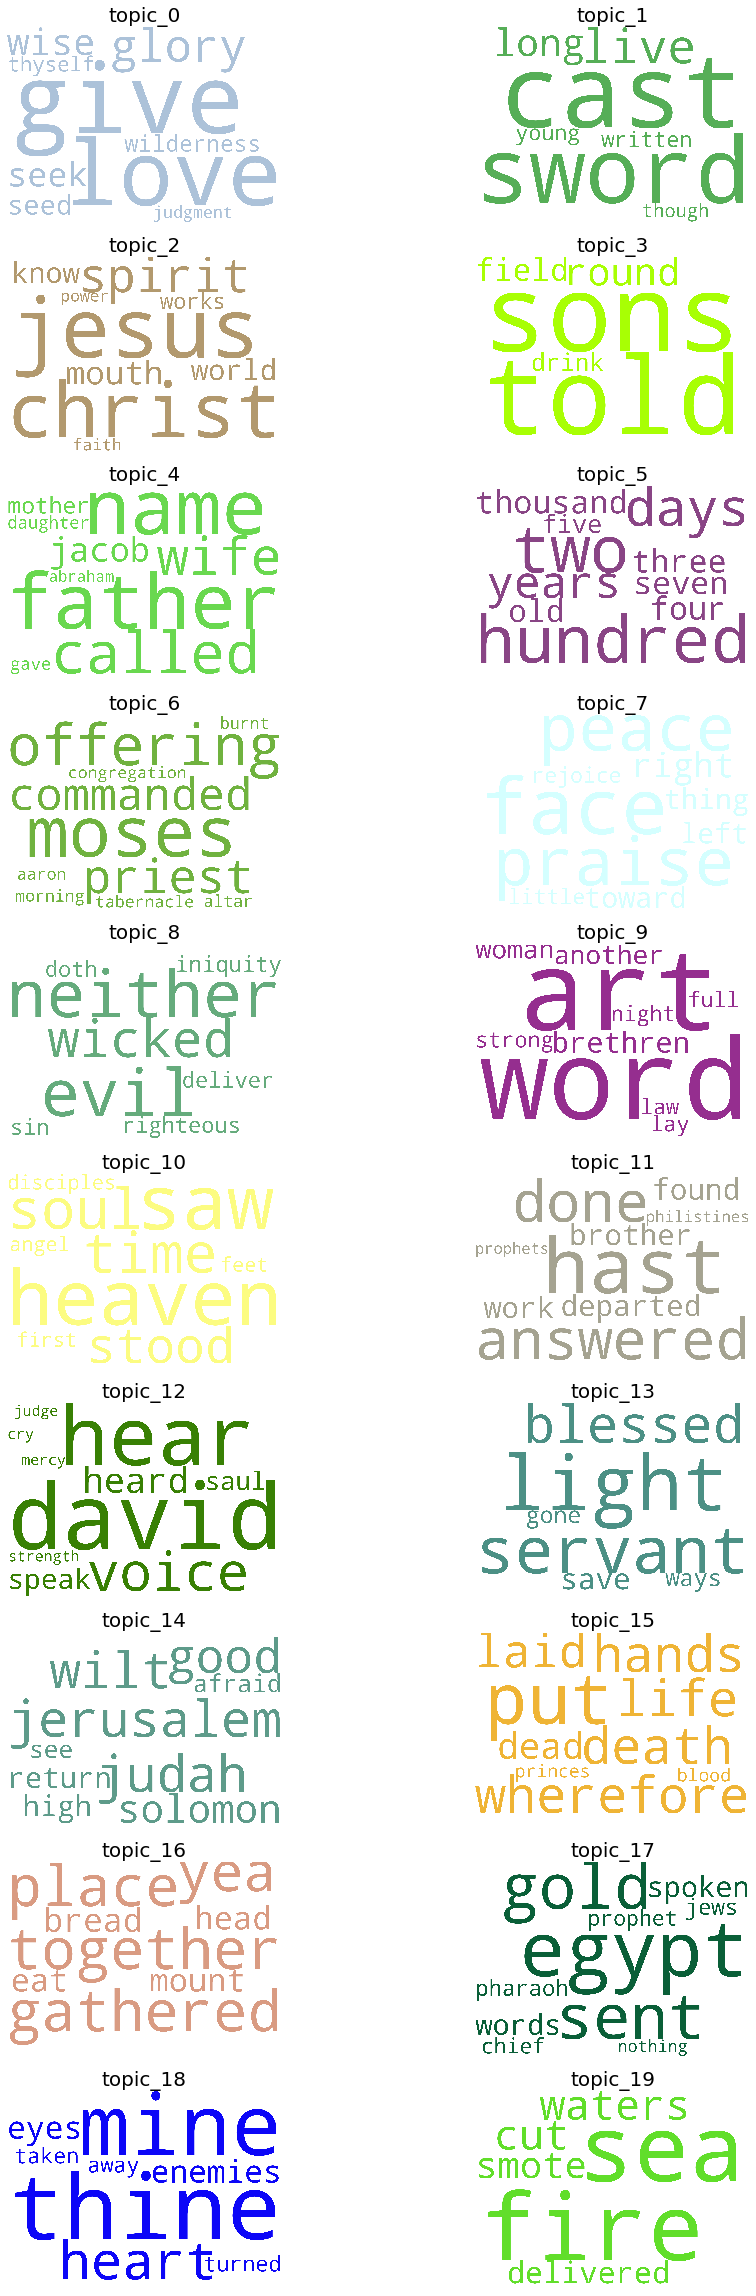

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(10, 2, figsize=(16,32), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = " ".join(actions.iloc[i].values)
    cloud.generate(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('topic_' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()